In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Data loading:

In [6]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

H√†m load_mnist tr√™n ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t·∫£i d·ªØ li·ªáu t·ª´ t·∫≠p d·ªØ li·ªáu MNIST

In [7]:
X_train, y_train = load_mnist('Contents', kind='train')
X_test, y_test = load_mnist('Contents', kind='t10k')

## Data Preprocessing:

In [8]:
# In ra shape c·ªßa d·ªØ li·ªáu
print('Training Data Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Data Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

# In ra m·ªôt s·ªë th√¥ng tin v·ªÅ d·ªØ li·ªáu
print('\nTh√¥ng tin d·ªØ li·ªáu:')
print('Gi√° tr·ªã pixel trong kho·∫£ng:', X_train.min(), 'ƒë·∫øn', X_train.max())
print('S·ªë l∆∞·ª£ng classes:', len(np.unique(y_train)))

Training Data Shape: (60000, 784)
Training Labels Shape: (60000,)
Testing Data Shape: (10000, 784)
Testing Labels Shape: (10000,)

Th√¥ng tin d·ªØ li·ªáu:
Gi√° tr·ªã pixel trong kho·∫£ng: 0 ƒë·∫øn 255
S·ªë l∆∞·ª£ng classes: 10


In [9]:
# Classes of Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# Set random seed for reproducibility
np.random.seed(0)

# Get one image from training set and reshape to 28x28
img = X_train[0].reshape(28, 28)

# Print the pixel matrix
print("Pixel matrix of the image (28x28 size):")
print("Each number represents pixel intensity (0-255):")
print()

for i in range(28):
    for j in range(28):
        print(f"{int(img[i,j]):3d}", end=" ")
    print()  

Pixel matrix of the image (28x28 size):
Each number represents pixel intensity (0-255):

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0

Hi·ªÉn th·ªã m·ªôt h√¨nh ·∫£nh t·ª´ t·∫≠p hu·∫•n luy·ªán MNIST d∆∞·ªõi d·∫°ng ma tr·∫≠n pixel.

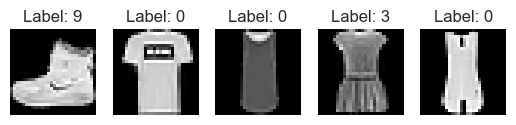

In [11]:
# Hi·ªÉn th·ªã 5 h√¨nh ·∫£nh ƒë·∫ßu ti√™n trong t·∫≠p hu·∫•n luy·ªán
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")  
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()

In [12]:
def find_duplicates(X):
    unique_images, indices = np.unique(X, axis=0, return_index=True)
    return len(X) != len(unique_images), indices

has_duplicates, unique_indices = find_duplicates(X_train)
if has_duplicates:
    print("Dataset has duplicates.")
else:
    print("No duplicates found.")

df = pd.DataFrame(X_train)

print("Missing values in DataFrame:", df.isnull().sum().sum())

No duplicates found.
Missing values in DataFrame: 0


In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Xmean = X_train.mean(axis=0)
X_train = X_train - Xmean
X_test = X_test - Xmean

Th·ª±c hi·ªán qu√° tr√¨nh chu·∫©n h√≥a d·ªØ li·ªáu h√¨nh ·∫£nh trong t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra MNIST, nh·∫±m c·∫£i thi·ªán hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh h·ªçc m√°y
- chia t·∫•t c·∫£ c√°c gi√° tr·ªã pixel c·ªßa h√¨nh ·∫£nh trong t·∫≠p hu·∫•n luy·ªán X_train v√† t·∫≠p ki·ªÉm tra X_test cho 255. Gi√° tr·ªã pixel, ban ƒë·∫ßu n·∫±m trong kho·∫£ng t·ª´ 0 ƒë·∫øn 255, s·∫Ω ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi v·ªÅ kho·∫£ng t·ª´ 0 ƒë·∫øn 1, chu·∫©n h√≥a gi√° tr·ªã pixel gi√∫p c·∫£i thi·ªán t·ªëc ƒë·ªô h·ªôi t·ª• v√† hi·ªáu su·∫•t c·ªßa c√°c thu·∫≠t to√°n h·ªçc m√°y, v√¨ n√≥ l√†m cho c√°c gi√° tr·ªã ƒë·∫ßu v√†o ƒë·ªìng nh·∫•t v√† gi·∫£m thi·ªÉu s·ª± ·∫£nh h∆∞·ªüng c·ªßa c√°c gi√° tr·ªã l·ªõn h∆°n.
- S·ª≠ d·ª•ng ph∆∞∆°ng ph√°p mean centering l√†m cho d·ªØ li·ªáu ƒë∆∞·ª£c ph√¢n b·ªë xung quanh gi√° tr·ªã 0, gi√∫p m√¥ h√¨nh h·ªçc m√°y d·ªÖ d√†ng h∆°n trong vi·ªác h·ªçc v√† t·ªëi ∆∞u h√≥a c√°c tr·ªçng s·ªë

In [14]:
print("First image in training set:\n", np.array(X_train[0]).reshape(28, 28)) 
print("Label:", y_train[0])

First image in training set:
 [[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04
  -9.79150327e-04 -1.62633987e-03 -3.22222222e-03 -8.72444444e-03
  -2.23477124e-02 -5.66064706e-02 -1.29239020e-01 -1.80072810e-01
  -2.04284706e-01 -1.99492484e-01 -1.98128889e-01 -2.11397712e-01
  -2.02067778e-01 -1.59424575e-01 -1.02428889e-01 -4.08181046e-02
  -1.61122876e-02 -7.76346405e-03 -4.63261438e-03 -3.33450980e-03
  -1.87000000e-03 -1.02065359e-03 -3.82941176e-04 -6.59477124e-05]
 [-2.79084967e-05 -9.43137255e-05 -3.95620915e-04 -1.42718954e-03
  -3.01934641e-03 -8.17150327e-03 -2.88511111e-02 -6.87690196e-02
  -1.25668431e-01 -2.07564510e-01 -3.12554444e-01 -3.92771046e-01
  -4.43457320e-01 -4.36227843e-01 -4.27772288e-01 -4.49786013e-01
  -4.33664379e-01 -3.57459673e-01 -2.81273007e-01 -1.76994379e-01
  -1.02619150e-01 -5.34571242e-02 -2.42860784e-02 -1.36563399e-02
  -8.66692810e-03 -4.73875817e-03 -1.83477124e-03 -3.27254902e-04]
 [-1.02483660e-04 -3.18235294e-04 -1.0451634

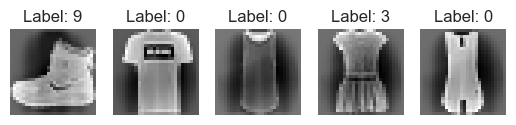

In [15]:
# Hi·ªÉn th·ªã 5 h√¨nh ·∫£nh ƒë·∫ßu ti√™n trong t·∫≠p hu·∫•n luy·ªán sau khi ƒë∆∞·ª£c chu·∫©n h√≥a
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")  
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()

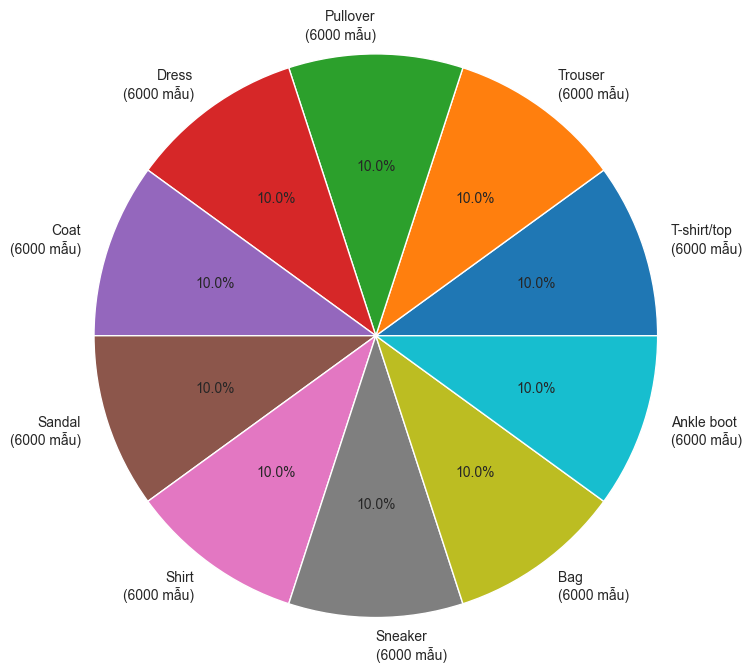

In [16]:
from collections import Counter

class_counts = Counter(y_train)

class_dict = {i: name for i, name in enumerate(class_names)}

plt.figure(figsize=(8, 8))
plt.pie([class_counts[i] for i in range(10)], 
        labels=[f"{class_dict[i]}\n({class_counts[i]} m·∫´u)" for i in range(10)],
        autopct='%1.1f%%')
plt.title('')
plt.axis('equal')
plt.show()

Ta th·∫•y ƒë∆∞·ª£c v·ªÅ c√°c class trong t·∫≠p test c·ªßa b·ªô d·ªØ li·ªáu
- Ph√¢n ph·ªëi ƒë·ªìng ƒë·ªÅu: M·ªói class trong t·∫≠p test ƒë·ªÅu c√≥ s·ªë l∆∞·ª£ng m·∫´u gi·ªëng nhau, c·ª• th·ªÉ l√† 6000 m·∫´u. ƒêi·ªÅu n√†y t∆∞∆°ng ·ª©ng v·ªõi t·ªâ l·ªá 10% cho m·ªói lo·∫°i s·∫£n ph·∫©m
- C√¢n b·∫±ng d·ªØ li·ªáu: T·∫≠p d·ªØ li·ªáu test ƒë∆∞·ª£c ph√¢n ph·ªëi ƒë·ªìng ƒë·ªÅu cho t·ª´ng class, ƒëi·ªÅu n√†y gi√∫p tr√°nh hi·ªán t∆∞·ª£ng l·ªách l·ªõp (class imbalance). M·ªôt t·∫≠p d·ªØ li·ªáu c√¢n b·∫±ng h·ªó tr·ª£ m√¥ h√¨nh h·ªçc m√°y trong vi·ªác nh·∫≠n di·ªán t·ª´ng lo·∫°i s·∫£n ph·∫©m m·ªôt c√°ch c√¥ng b·∫±ng v√† gi·∫£m nguy c∆° thi√™n v·ªã.

## Support Vector Machine (SVM):

Support Vector Machine (SVM) l√† m·ªôt thu·∫≠t to√°n h·ªçc c√≥ gi√°m s√°t, ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ph√¢n lo·∫°i v√† h·ªìi quy. Trong ph√¢n lo·∫°i, SVM ho·∫°t ƒë·ªông b·∫±ng c√°ch t√¨m ki·∫øm m·ªôt si√™u ph·∫≥ng (hyperplane) t·ªëi ∆∞u ƒë·ªÉ ph√¢n chia d·ªØ li·ªáu th√†nh c√°c l·ªõp kh√°c nhau. M·ª•c ti√™u c·ªßa SVM l√† t·ªëi ƒëa h√≥a kho·∫£ng c√°ch gi·ªØa c√°c ƒëi·ªÉm d·ªØ li·ªáu g·∫ßn nh·∫•t c·ªßa hai l·ªõp v√† si√™u ph·∫≥ng ph√¢n chia ch√∫ng. Kho·∫£ng c√°ch n√†y ƒë∆∞·ª£c g·ªçi l√† l·ªÅ (margin), v√† m·ªôt si√™u ph·∫≥ng v·ªõi l·ªÅ l·ªõn h∆°n th∆∞·ªùng c√≥ kh·∫£ nƒÉng t·ªïng qu√°t h√≥a t·ªët h∆°n khi ph√¢n lo·∫°i c√°c ƒëi·ªÉm d·ªØ li·ªáu m·ªõi.
1. Nguy√™n l√Ω ho·∫°t ƒë·ªông c·ªßa SVM
   - **T√¨m Si√™u ph·∫≥ng T·ªëi ∆∞u:** SVM t√¨m ki·∫øm si√™u ph·∫≥ng t·ªëi ∆∞u ƒë·ªÉ ph√¢n chia c√°c l·ªõp b·∫±ng c√°ch t·ªëi ƒëa h√≥a l·ªÅ gi·ªØa c√°c ƒëi·ªÉm d·ªØ li·ªáu g·∫ßn nh·∫•t c·ªßa hai l·ªõp (c√°c ƒëi·ªÉm n√†y ƒë∆∞·ª£c g·ªçi l√† c√°c vector h·ªó tr·ª£ (support vectors)). ƒê·ªëi v·ªõi b√†i to√°n tuy·∫øn t√≠nh, si√™u ph·∫≥ng n√†y c√≥ th·ªÉ ƒë∆∞·ª£c bi·ªÉu di·ªÖn b·ªüi ph∆∞∆°ng tr√¨nh: $w \cdot x + b = 0$. $w$ l√† vector tr·ªçng s·ªë, hay vector ph√°p tuy·∫øn (normal vector) c·ªßa si√™u ph·∫≥ng t·ªëi ∆∞u, $x$ l√† vector ƒë·∫°i di·ªán cho c√°c ƒëi·ªÉm d·ªØ li·ªáu, $b$ l√† bias, hay ƒë·ªô d·ªãch c·ªßa si√™u ph·∫≥ng t·ªëi ∆∞u.
   - **T·ªëi ∆∞u h√≥a L·ªÅ:** SVM t·ªëi ∆∞u h√≥a l·ªÅ b·∫±ng c√°ch t√¨m c√°c vector h·ªó tr·ª£ v√† thi·∫øt l·∫≠p kho·∫£ng c√°ch gi·ªØa ch√∫ng v√† si√™u ph·∫≥ng t·ªëi ∆∞u. L·ªÅ l·ªõn h∆°n gi√∫p gi·∫£m nguy c∆° overfitting, c·∫£i thi·ªán kh·∫£ nƒÉng d·ª± ƒëo√°n tr√™n d·ªØ li·ªáu m·ªõi.

2. SVM v·ªõi Nh√¢n (Kernel)
- V·ªõi c√°c d·ªØ li·ªáu ph·ª©c t·∫°p ho·∫∑c kh√¥ng th·ªÉ ph√¢n t√°ch tuy·∫øn t√≠nh, SVM s·ª≠ d·ª•ng h√†m kernel ƒë·ªÉ bi·∫øn ƒë·ªïi d·ªØ li·ªáu th√†nh kh√¥ng gian ƒë·∫∑c tr∆∞ng cao h∆°n, n∆°i c√°c l·ªõp c√≥ th·ªÉ ph√¢n t√°ch d·ªÖ d√†ng h∆°n. M·ªôt s·ªë h√†m kernel ph·ªï bi·∫øn bao g·ªìm:
   - **Linear Kernel:** Ph√π h·ª£p cho d·ªØ li·ªáu c√≥ th·ªÉ ph√¢n t√°ch tuy·∫øn t√≠nh.
   - **Polynomial Kernel:** Bi·∫øn ƒë·ªïi d·ªØ li·ªáu v·ªõi h√†m ƒëa th·ª©c.
   - **Radial Basis Function (RBF) Kernel:** L√† h√†m kernel ph·ªï bi·∫øn nh·∫•t cho d·ªØ li·ªáu kh√¥ng tuy·∫øn t√≠nh, bi·∫øn ƒë·ªïi d·ªØ li·ªáu v√†o m·ªôt kh√¥ng gian v√¥ h·∫°n chi·ªÅu, gi√∫p ph√¢n t√°ch c√°c ƒëi·ªÉm d·ªØ li·ªáu ph·ª©c t·∫°p.

### Implement SVM

In [17]:
# H√†m ƒë·ªÉ train v√† evaluate model
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel='linear', C=1.0):
    # Ghi l·∫°i th·ªùi gian b·∫Øt ƒë·∫ßu
    start_time = time.time()
    
    # Kh·ªüi t·∫°o model
    svm = SVC(kernel=kernel, C=C)
    
    # Train model
    print(f"\nTraining SVM with {kernel} kernel...")
    svm.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Th·ªùi gian prediction
    start_time = time.time()
    y_pred = svm.predict(X_test)
    predict_time = time.time() - start_time
    
    # T√≠nh accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # In k·∫øt qu·∫£
    print(f"\nK·∫øt qu·∫£ cho SVM v·ªõi {kernel} kernel:")
    print(f"Th·ªùi gian training: {train_time:.2f} gi√¢y")
    print(f"Th·ªùi gian prediction: {predict_time:.2f} gi√¢y")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, 
                              target_names=class_names))
    
    return svm, y_pred, train_time, predict_time, accuracy

def train_and_evaluate_svm_v2(X_train, X_test, y_train, y_test, kernel='linear', C=1.0):
    # Ghi l·∫°i th·ªùi gian b·∫Øt ƒë·∫ßu
    start_time = time.time()
    
    # Kh·ªüi t·∫°o model
    svm = SVC(kernel=kernel, C=C)
    
    # Train model
    print(f"\nTraining SVM with {kernel} kernel and small sample...")
    svm.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Th·ªùi gian prediction
    start_time = time.time()
    y_pred = svm.predict(X_test)
    predict_time = time.time() - start_time
    
    # T√≠nh accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # In k·∫øt qu·∫£
    print(f"\nK·∫øt qu·∫£ cho SVM v·ªõi {kernel} kernel:")
    print(f"Th·ªùi gian training: {train_time:.2f} gi√¢y")
    print(f"Th·ªùi gian prediction: {predict_time:.2f} gi√¢y")
    print(f"Accuracy: {accuracy:.4f}")
    
    return svm, y_pred, train_time, predict_time, accuracy

# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


Training SVM with linear kernel...

K·∫øt qu·∫£ cho SVM v·ªõi linear kernel:
Th·ªùi gian training: 288.81 gi√¢y
Th·ªùi gian prediction: 59.51 gi√¢y
Accuracy: 0.8464

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.81      0.78      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.73      0.77      0.75      1000
       Dress       0.85      0.84      0.85      1000
        Coat       0.76      0.77      0.77      1000
      Sandal       0.93      0.94      0.93      1000
       Shirt       0.63      0.56      0.60      1000
     Sneaker       0.92      0.93      0.93      1000
         Bag       0.95      0.93      0.94      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



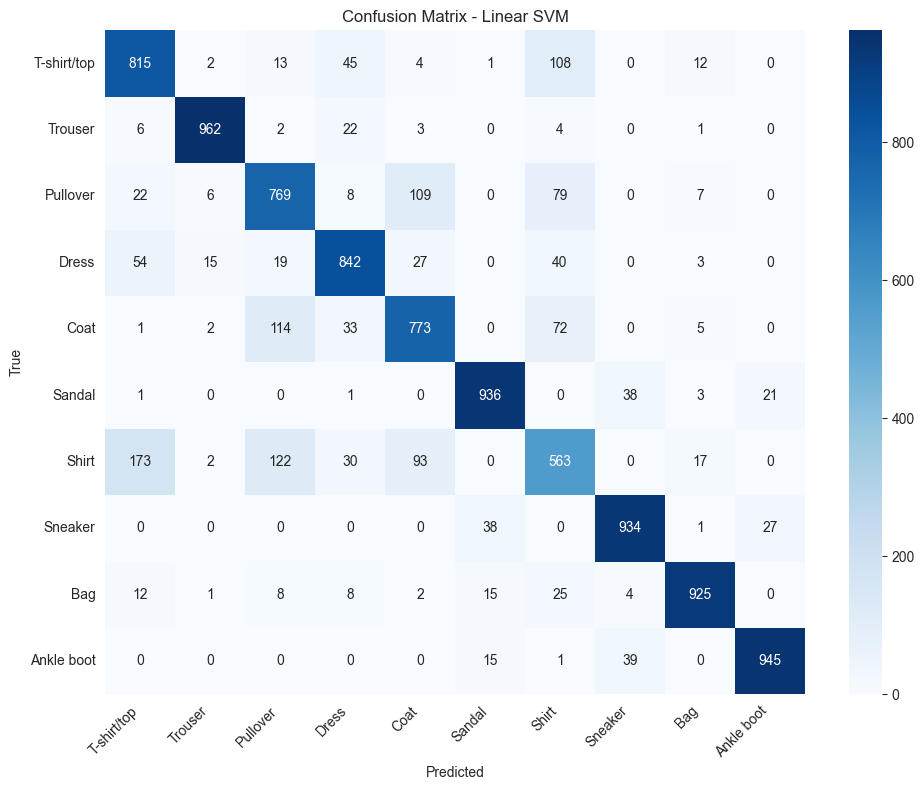

In [18]:
# Train v√† evaluate Linear SVM
linear_svm, linear_pred, linear_train_time, linear_pred_time, linear_acc = \
    train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel='linear')
# Plot confusion matrices
plot_confusion_matrix(y_test, linear_pred, 'Confusion Matrix - Linear SVM')

Th·ªùi gian hu·∫•n luy·ªán v√† d·ª± ƒëo√°n:

- Th·ªùi gian hu·∫•n luy·ªán: 340.94 gi√¢y, cho th·∫•y m√¥ h√¨nh m·∫•t kh√° nhi·ªÅu th·ªùi gian ƒë·ªÉ hu·∫•n luy·ªán. ƒêi·ªÅu n√†y do k√≠ch th∆∞·ªõc d·ªØ li·ªáu l·ªõn ho·∫∑c s·ªë chi·ªÅu d·ªØ li·ªáu cao.
- Th·ªùi gian d·ª± ƒëo√°n: 76.61 gi√¢y, l√† h·ª£p l√Ω nh∆∞ng v·∫´n cho th·∫•y vi·ªác d·ª± ƒëo√°n m·∫•t th·ªùi gian ƒë√°ng k·ªÉ.
- 
ƒê·ªô ch√≠nh x√°c (Accuracy):
ƒê·ªô ch√≠nh x√°c t·ªïng th·ªÉ c·ªßa m√¥ h√¨nh l√† 84.64%, ƒë√¢y l√† m·ªôt k·∫øt qu·∫£ t·ªët ƒë·ªëi v·ªõi SVM tuy·∫øn t√≠nh

C√°c ch·ªâ s·ªë ph√¢n lo·∫°i:
- C√°c l·ªõp Trouser v√† Ankle boot c√≥ k·∫øt qu·∫£ cao nh·∫•t, v·ªõi precision, recall v√† f1-score g·∫ßn ho·∫∑c tr√™n 90%. ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh r·∫•t ch√≠nh x√°c v·ªõi c√°c l·ªõp n√†y.
- Shirt v√† Bag c√≥ ƒëi·ªÉm s·ªë th·∫•p h∆°n, ƒë·∫∑c bi·ªát l√† v·ªÅ ƒë·ªô ch√≠nh x√°c (precision) v√† f1-score, ƒëi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh g·∫∑p kh√≥ khƒÉn h∆°n khi ph√¢n lo·∫°i c√°c danh m·ª•c n√†y. Nguy√™n nh√¢n c√≥ th·ªÉ l√† do ch√∫ng c√≥ ƒë·∫∑c ƒëi·ªÉm d·ªÖ nh·∫ßm l·∫´n v·ªõi c√°c danh m·ª•c kh√°c.
- Macro average (trung b√¨nh kh√¥ng tr·ªçng s·ªë c·ªßa c√°c ch·ªâ s·ªë tr√™n t·∫•t c·∫£ c√°c l·ªõp) v√† Weighted average (trung b√¨nh c√≥ tr·ªçng s·ªë theo s·ªë l∆∞·ª£ng m·∫´u c·ªßa m·ªói l·ªõp) ƒë·ªÅu cho th·∫•y f1-score ·ªü m·ª©c 85%.

Hi·ªáu su·∫•t c√¢n b·∫±ng:
- V·ªõi f1-score trung b√¨nh (macro v√† weighted) kho·∫£ng 0.85, m√¥ h√¨nh c√≥ v·∫ª ho·∫°t ƒë·ªông c√¢n b·∫±ng tr√™n c√°c l·ªõp, nh∆∞ng ƒëi·ªÉm s·ªë th·∫•p ·ªü m·ªôt s·ªë l·ªõp nh∆∞ Shirt v√† Bag cho th·∫•y c√≥ th·ªÉ c√≥ s·ª± nh·∫ßm l·∫´n gi·ªØa ch√∫ng v√† c√°c m·∫∑t h√†ng t∆∞∆°ng t·ª±.

T·ª´ confusion matrix c√≥ th·ªÉ th·∫•y ƒë∆∞·ª£c m√¥ h√¨nh g·∫∑p kh√≥ khƒÉn khi ph√¢n lo·∫°i shirt v√† T-shirt/top v√¨ ch√∫ng kh√° l√† gi·ªëng nhau, ƒëi·ªÅu n√†y c≈©ng x·∫£y ra t∆∞∆°ng t·ª± v·ªõi Pullover - Shirt, Coat - Shirt v√† Coat - Pullover


Training SVM with rbf kernel...

K·∫øt qu·∫£ cho SVM v·ªõi rbf kernel:
Th·ªùi gian training: 256.95 gi√¢y
Th·ªùi gian prediction: 103.76 gi√¢y
Accuracy: 0.8879

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.80      0.82      0.81      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.81      0.82      0.82      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.73      0.67      0.70      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



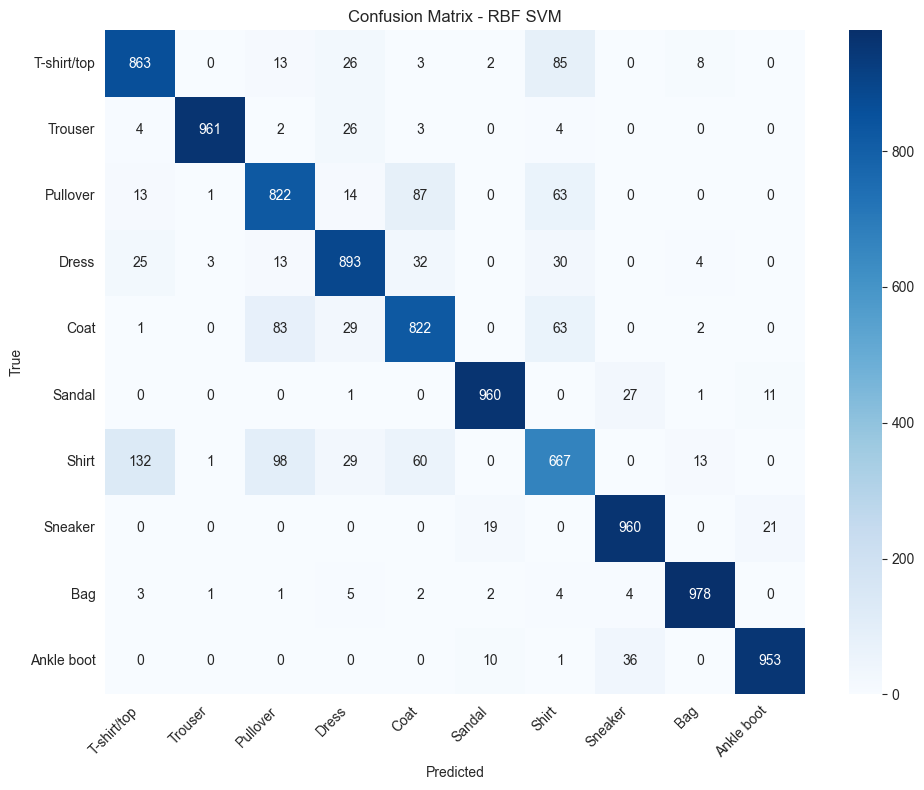

In [19]:
# Train v√† evaluate RBF SVM
rbf_svm, rbf_pred, rbf_train_time, rbf_pred_time, rbf_acc = \
    train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel='rbf')
plot_confusion_matrix(y_test, rbf_pred, 'Confusion Matrix - RBF SVM')

Th·ªùi gian hu·∫•n luy·ªán v√† d·ª± ƒëo√°n:
- Th·ªùi gian hu·∫•n luy·ªán: 283.57 gi√¢y, ng·∫Øn h∆°n so v·ªõi m√¥ h√¨nh SVM v·ªõi kernel tuy·∫øn t√≠nh (340.94 gi√¢y), cho th·∫•y kernel RBF t·ªëi ∆∞u h∆°n m·ªôt ch√∫t v·ªÅ th·ªùi gian hu·∫•n luy·ªán.
- Th·ªùi gian d·ª± ƒëo√°n: 207.57 gi√¢y, d√†i h∆°n ƒë√°ng k·ªÉ so v·ªõi kernel tuy·∫øn t√≠nh (76.61 gi√¢y)
    
ƒê·ªô ch√≠nh x√°c (Accuracy):
- ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh l√† 88.79%, cao h∆°n ƒë√°ng k·ªÉ so v·ªõi kernel tuy·∫øn t√≠nh (84.64%)
- Precision, Recall, v√† F1-score ƒë·ªÅu tƒÉng so v·ªõi m√¥ h√¨nh tuy·∫øn t√≠nh
- C√°c l·ªõp nh∆∞ Trouser, Sneaker, v√† Ankle boot v·∫´n gi·ªØ ƒë∆∞·ª£c k·∫øt qu·∫£ r·∫•t cao, v·ªõi f1-score x·∫•p x·ªâ ho·∫∑c tr√™n 0.95, cho th·∫•y m√¥ h√¨nh nh·∫≠n di·ªán r·∫•t t·ªët cho c√°c l·ªõp n√†y.
- L·ªõp Shirt v·∫´n l√† l·ªõp c√≥ k·∫øt qu·∫£ th·∫•p nh·∫•t, v·ªõi f1-score l√† 0.76 (cao h∆°n m·ªôt ch√∫t so v·ªõi kernel tuy·∫øn t√≠nh). ƒêi·ªÅu n√†y cho th·∫•y d√π ƒë√£ c√≥ c·∫£i thi·ªán, nh∆∞ng Shirt v·∫´n d·ªÖ b·ªã nh·∫ßm l·∫´n v·ªõi c√°c l·ªõp kh√°c.

Hi·ªáu su·∫•t t·ªïng th·ªÉ:
- Macro avg v√† Weighted avg c·ªßa f1-score ƒë·ªÅu ƒë·∫°t 0.89, cao h∆°n so v·ªõi kernel tuy·∫øn t√≠nh (0.85). ƒêi·ªÅu n√†y cho th·∫•y kernel RBF gi√∫p c·∫£i thi·ªán hi·ªáu su·∫•t t·ªïng th·ªÉ tr√™n t·∫•t c·∫£ c√°c l·ªõp.

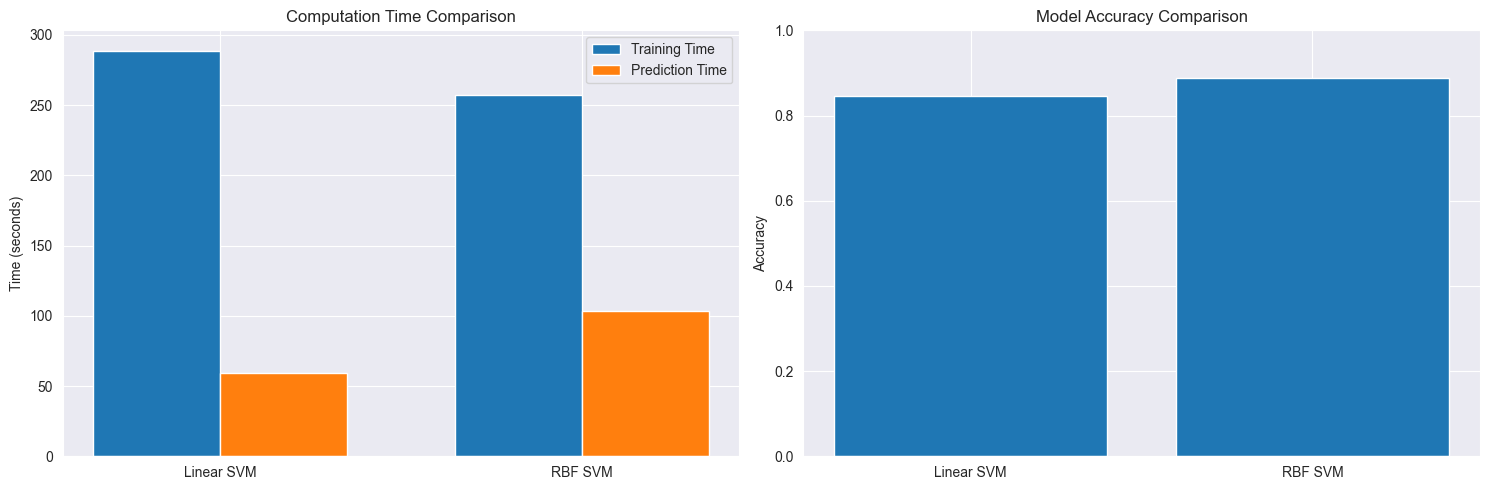


K·∫øt qu·∫£ t·ªïng h·ª£p:
     Model  Training Time (s)  Prediction Time (s)  Accuracy
Linear SVM         288.805214            59.510849    0.8464
   RBF SVM         256.946382           103.761336    0.8879


In [20]:
# So s√°nh th·ªùi gian v√† accuracy
models = ['Linear SVM', 'RBF SVM']
train_times = [linear_train_time, rbf_train_time]
pred_times = [linear_pred_time, rbf_pred_time]
accuracies = [linear_acc, rbf_acc]

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Time comparison
x = range(len(models))
width = 0.35

ax1.bar(x, train_times, width, label='Training Time')
ax1.bar([i + width for i in x], pred_times, width, label='Prediction Time')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('Computation Time Comparison')
ax1.set_xticks([i + width/2 for i in x])
ax1.set_xticklabels(models)
ax1.legend()

# Accuracy comparison
ax2.bar(models, accuracies)
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy Comparison')
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

# In k·∫øt qu·∫£ t·ªïng h·ª£p
print("\nK·∫øt qu·∫£ t·ªïng h·ª£p:")
results_df = pd.DataFrame({
    'Model': models,
    'Training Time (s)': train_times,
    'Prediction Time (s)': pred_times,
    'Accuracy': accuracies
})
print(results_df.to_string(index=False))

- Th·ªùi gian hu·∫•n luy·ªán (Training Time):
Linear SVM c√≥ th·ªùi gian hu·∫•n luy·ªán d√†i h∆°n so v·ªõi RBF SVM. ƒêi·ªÅu n√†y c√≥ th·ªÉ do RBF SVM th∆∞·ªùng hi·ªáu qu·∫£ h∆°n trong vi·ªác t√¨m ki·∫øm si√™u ph·∫≥ng ph√¢n chia t·ªëi ∆∞u trong kh√¥ng gian phi tuy·∫øn t√≠nh, nh·ªù kh·∫£ nƒÉng t·∫°o ra c√°c kh√¥ng gian ƒë·∫∑c tr∆∞ng cao h∆°n.
- Th·ªùi gian d·ª± ƒëo√°n (Prediction Time):
RBF SVM c√≥ th·ªùi gian d·ª± ƒëo√°n d√†i h∆°n Linear SVM. ƒêi·ªÅu n√†y c√≥ th·ªÉ do t√≠nh to√°n trong kh√¥ng gian ƒë·∫∑c tr∆∞ng cao h∆°n, khi·∫øn vi·ªác d·ª± ƒëo√°n c·ªßa RBF ph·ª©c t·∫°p h∆°n.
- ƒê·ªô ch√≠nh x√°c
ƒê·ªô ch√≠nh x√°c c·ªßa RBF SVM cao h∆°n m·ªôt ch√∫t so v·ªõi Linear SVM. RBF c√≥ kh·∫£ nƒÉng x·ª≠ l√Ω t·ªët h∆°n v·ªõi d·ªØ li·ªáu kh√¥ng tuy·∫øn t√≠nh nh·ªù kh·∫£ nƒÉng bi·∫øn ƒë·ªïi kh√¥ng gian ƒë·∫ßu v√†o sang kh√¥ng gian ƒë·∫∑c tr∆∞ng cao h∆°n, gi√∫p ph√¢n lo·∫°i ch√≠nh x√°c h∆°n c√°c m·∫´u ph·ª©c t·∫°p.
- L√Ω do ch√™nh l·ªách
    - B·∫£n ch·∫•t d·ªØ li·ªáu:N·∫øu d·ªØ li·ªáu c√≥ quan h·ªá tuy·∫øn t√≠nh, Linear SVM c√≥ th·ªÉ ho·∫°t ƒë·ªông t·ªët. Tuy nhi√™n, b·ªô d·ªØ li·ªáu Fashion-MNIST l√† d·ªØ li·ªáu c√≥ c·∫•u tr√∫c phi tuy·∫øn t√≠nh, RBF SVM s·∫Ω c√≥ ∆∞u th·∫ø nh·ªù kh·∫£ nƒÉng bi·∫øn ƒë·ªïi kh√¥ng gian.
    - T√≠nh linh ho·∫°t: RBF kernel c√≥ kh·∫£ nƒÉng linh ho·∫°t h∆°n trong vi·ªác ƒëi·ªÅu ch·ªânh ƒë·ªÉ ph√π h·ª£p v·ªõi s·ª± ph·ª©c t·∫°p c·ªßa d·ªØ li·ªáu, trong khi Linear SVM ch·ªâ c√≥ th·ªÉ t·∫°o ra m·ªôt si√™u ph·∫≥ng tuy·∫øn t√≠nh.
    - Chi ph√≠ t√≠nh to√°n: Linear SVM th∆∞·ªùng nhanh h∆°n trong d·ª± ƒëo√°n do t√≠nh to√°n √≠t ph·ª©c t·∫°p h∆°n, nh∆∞ng c√≥ th·ªÉ ch·∫≠m h∆°n trong hu·∫•n luy·ªán n·∫øu c·∫ßn t√¨m ki·∫øm si√™u ph·∫≥ng t·ªëi ∆∞u cho d·ªØ li·ªáu l·ªõn.

### Hyperparameter tuning

SVM c√≥ hai tham s·ªë quan tr·ªçng:
- C (Cost): Tham s·ªë n√†y ki·ªÉm so√°t ƒë·ªô c·ª©ng/m·ªÅm c·ªßa l·ªÅ. Khi ùê∂ l·ªõn, SVM s·∫Ω c·ªë g·∫Øng ph√¢n lo·∫°i ch√≠nh x√°c t·∫•t c·∫£ c√°c ƒëi·ªÉm d·ªØ li·ªáu, k·ªÉ c·∫£ khi ph·∫£i hy sinh kho·∫£ng c√°ch l·ªÅ, d·∫´n ƒë·∫øn nguy c∆° overfitting. Khi ùê∂ nh·ªè, SVM s·∫Ω cho ph√©p m·ªôt s·ªë ƒëi·ªÉm n·∫±m sai ph√≠a c·ªßa si√™u ph·∫≥ng, tƒÉng c∆∞·ªùng kh·∫£ nƒÉng t·ªïng qu√°t h√≥a.
- Gamma (ƒë·ªëi v·ªõi RBF Kernel): Tham s·ªë gamma x√°c ƒë·ªãnh ph·∫°m vi ·∫£nh h∆∞·ªüng c·ªßa m·ªôt ƒëi·ªÉm d·ªØ li·ªáu ƒë∆°n l·∫ª. Gi√° tr·ªã gamma cao khi·∫øn m·ªói ƒëi·ªÉm d·ªØ li·ªáu ch·ªâ ·∫£nh h∆∞·ªüng ƒë·∫øn nh·ªØng ƒëi·ªÉm g·∫ßn n√≥, gi√∫p t·∫°o ra bi√™n gi·ªõi ph√¢n l·ªõp ph·ª©c t·∫°p h∆°n. Ng∆∞·ª£c l·∫°i, gamma th·∫•p s·∫Ω khi·∫øn m·ªói ƒëi·ªÉm ·∫£nh h∆∞·ªüng ƒë·∫øn to√†n b·ªô d·ªØ li·ªáu, t·∫°o ra bi√™n gi·ªõi ƒë∆°n gi·∫£n h∆°n.

Trong ph·∫ßn n√†y ch·ªâ ƒëi hi·ªáu chinh tham s·ªë C ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c cao nh·∫•t cho RBF SVM v√¨ n√≥ ph√π h·ª£p v·ªõi b·ªô d·ªØ li·ªáu Fashion-MNIST

V√¨ s·ª± hi·ªáu ch·ªânh c·∫ßn ch·∫°y m√¥ h√¨nh nhi·ªÅu l·∫ßn n√™n s·∫Ω th·ª±c hi·ªán chia nh·ªè m·∫´u ra ƒë·ªÉ ch·∫°y v·ªõi m·ª•c ƒë√≠ch nh·∫±m r√∫t ng·∫Øn th·ªùi gian hu·∫•n luy·ªán.

In [21]:
def balance_classes(X, y, num_classes=10, samples_per_class=600):
    X_balanced, y_balanced = [], []
    
    for i in range(num_classes):
        class_indices = np.where(y == i)[0]
        chosen_indices = np.random.choice(class_indices, samples_per_class, replace=False)
        
        X_balanced.append(X[chosen_indices])
        y_balanced.append(y[chosen_indices])
    
    return np.vstack(X_balanced), np.hstack(y_balanced)

# Balance train and test data
X_small_train, y_small_train = balance_classes(X_train, y_train, num_classes=10, samples_per_class=600)
X_small_test, y_small_test = balance_classes(X_test, y_test, num_classes=10, samples_per_class=100)


ƒê·∫£m b·∫£o d·ªØ li·ªáu c√≥ nh√£n balance khi l·∫•y sample, h∆∞·ªõng ti·∫øp c·∫≠n n√†y l√† two-stage training, m·∫´u d·ªØ li·ªáu nh·ªè b·∫±ng 1/10 m·∫´u d·ªØ li·ªáu g·ªëc

In [22]:
# Train v√† evaluate RBF SVM tr√™n b·ªô m·∫´u nh·ªè 
rbf_svm, rbf_pred_s, rbf_train_time_s, rbf_pred_time_s, rbf_acc_s = \
    train_and_evaluate_svm_v2(X_small_train, X_small_test, y_small_train, y_small_test, kernel='rbf')


Training SVM with rbf kernel and small sample...

K·∫øt qu·∫£ cho SVM v·ªõi rbf kernel:
Th·ªùi gian training: 4.19 gi√¢y
Th·ªùi gian prediction: 1.78 gi√¢y
Accuracy: 0.8380


M·∫´u d·ªØ li·ªáu nh·ªè b·∫±ng 1/10 so v·ªõi ban ƒë·∫ßu cho ra c√°c th√¥ng s·ªë cao c·ªßa m√¥ h√¨nh RBF SVM, v·ªõi th·ªùi gian hu·∫•n luy·ªán v√† th·ªùi gian test gi·∫£m kho·∫£ng 100 l·∫ßn so v·ªõi d·ªØ li·ªáu g·ªëc m√† n√≥ l·∫°i cho ƒë·ªô ch√≠nh x√°c ch·ªâ ch√™nh l·ªách kho·∫£ng 4%. Th·∫•y ƒë∆∞·ª£c d·ªØ li·ªáu g·ªëc l√† b·ªô d·ªØ li·ªáu l√Ω t∆∞·ªüng cho m√¥ h√¨nh m√°y h·ªçc 

In [23]:
import warnings
warnings.filterwarnings("ignore")

X_small_df = pd.DataFrame(X_small_train)
y_small_df = pd.DataFrame(y_small_train)

Cs = np.logspace(-2, 3, num=10)
MCV_list = []

for C in Cs:
    current_svm = SVC(kernel='rbf', C=C)
    kf = KFold(n_splits=3, random_state=1, shuffle=True)

    mean_crossval = np.mean(cross_val_score(current_svm, X_small_df, y_small_df, cv=kf))
    MCV_list.append(mean_crossval)
    print("On C=", C, "\tMCV=", mean_crossval)


On C= 0.01 	MCV= 0.588
On C= 0.03593813663804628 	MCV= 0.7334999999999999
On C= 0.1291549665014884 	MCV= 0.7821666666666666
On C= 0.464158883361278 	MCV= 0.8248333333333333
On C= 1.6681005372000592 	MCV= 0.8526666666666666
On C= 5.994842503189409 	MCV= 0.8603333333333335
On C= 21.544346900318846 	MCV= 0.8543333333333333
On C= 77.42636826811278 	MCV= 0.8553333333333333
On C= 278.2559402207126 	MCV= 0.8553333333333333
On C= 1000.0 	MCV= 0.8553333333333333


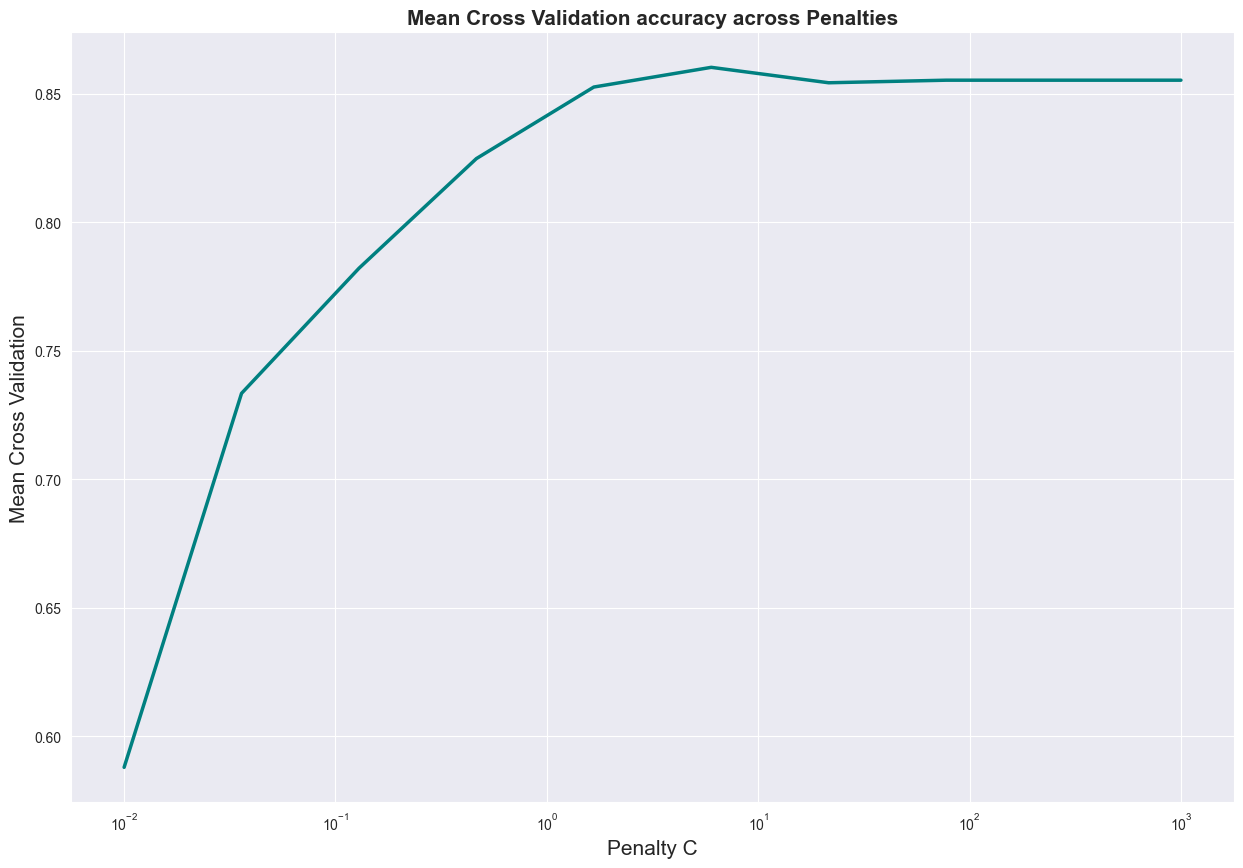

In [24]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,10))
lw = 2.5

plt.plot(Cs, MCV_list, color= 'teal', linewidth = lw)
plt.title("Mean Cross Validation accuracy across Penalties" ,fontsize=15, fontweight="bold")
plt.xlabel('Penalty C', fontsize = 15)
plt.xscale("log")
plt.ylabel('Mean Cross Validation', fontsize = 15)
plt.show()

Ch·ªçn ùê∂=5.994842503189409 v√¨ n√≥ ƒë·∫°t MCV cao nh·∫•t v√† kh√¥ng c√≥ d·∫•u hi·ªáu gi·∫£m hi·ªáu su·∫•t ƒë√°ng k·ªÉ khi th·ª≠ nghi·ªám tr√™n c√°c gi√° tr·ªã C cao h∆°n c√≥ th·ªÉ an t√¢m r·∫±ng m√¥ h√¨nh kh√¥ng b·ªã overfitting.

In [25]:
# Train v√† evaluate RBF SVM
rbf_svm, rbf_pred, rbf_train_time, rbf_pred_time, rbf_acc = \
    train_and_evaluate_svm_v2(X_small_train, X_small_test, y_small_train, y_small_test, kernel='rbf', C=5.994842503189409)


Training SVM with rbf kernel and small sample...

K·∫øt qu·∫£ cho SVM v·ªõi rbf kernel:
Th·ªùi gian training: 4.10 gi√¢y
Th·ªùi gian prediction: 1.52 gi√¢y
Accuracy: 0.8750


M·ªçi th√¥ng s·ªë sau khi hu·∫•n huy·ªán m√¥ h√¨nh b·∫±ng gi√° tr·ªã C m·ªõi th√¨ c√≥ s·ª± c·∫£i thi·ªán l·ªõn 

In [26]:
# Train v√† evaluate RBF SVM
rbf_svm, rbf_pred, rbf_train_time, rbf_pred_time, rbf_acc = \
    train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel='rbf', C=5.994842503189409)


Training SVM with rbf kernel...

K·∫øt qu·∫£ cho SVM v·ªõi rbf kernel:
Th·ªùi gian training: 250.24 gi√¢y
Th·ªùi gian prediction: 100.89 gi√¢y
Accuracy: 0.9013

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.83      0.83      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.84      0.84      0.84      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.75      0.72      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Vi·ªác ƒëi·ªÅu ch·ªânh tham s·ªë C ƒë√£ gi√∫p m√¥ h√¨nh ƒë·∫°t ƒë∆∞·ª£c hi·ªáu su·∫•t cao v·ªõi ƒë·ªô ch√≠nh x√°c t·ªïng th·ªÉ 90.13%. H∆°n n·ªØa, th·ªùi gian hu·∫•n luy·ªán v√† d·ª± ƒëo√°n th·∫•p h∆°n so v·ªõi m√¥ h√¨nh ban ƒë·∫ßu cho th·∫•y m√¥ h√¨nh n√†y ƒë√£ th·ª±c hi·ªán t·ªët h∆°n.

## PCA v√† LDA

Ph√¢n t√≠ch Ph√¢n bi·ªát Tuy·∫øn t√≠nh (LDA) v√† Ph√¢n t√≠ch Th√†nh ph·∫ßn Ch√≠nh (PCA) ƒë·ªÅu l√† c√°c k·ªπ thu·∫≠t gi·∫£m chi·ªÅu d·ªØ li·ªáu ph·ªï bi·∫øn trong h·ªçc m√°y, nh∆∞ng ch√∫ng kh√°c nhau c∆° b·∫£n v·ªÅ m·ª•c ti√™u, c√°ch ho·∫°t ƒë·ªông v√† c√°ch ch√∫ng bi·∫øn ƒë·ªïi d·ªØ li·ªáu. D∆∞·ªõi ƒë√¢y l√† s·ª± kh√°c bi·ªát gi·ªØa ch√∫ng:
1. M·ª•c ti√™u
- PCA: T√¨m ki·∫øm c√°c h∆∞·ªõng (th√†nh ph·∫ßn ch√≠nh) ƒë·ªÉ gi·∫£i th√≠ch s·ª± bi·∫øn thi√™n l·ªõn nh·∫•t trong d·ªØ li·ªáu, kh√¥ng ph·ª• thu·ªôc v√†o nh√£n l·ªõp. ƒê√¢y l√† m·ªôt k·ªπ thu·∫≠t kh√¥ng gi√°m s√°t, nghƒ©a l√† n√≥ kh√¥ng xem x√©t c√°c nh√£n l·ªõp khi x√°c ƒë·ªãnh c√°c h∆∞·ªõng trong d·ªØ li·ªáu.
- LDA: Nh·∫±m t·ªëi ƒëa h√≥a s·ª± t√°ch bi·ªát gi·ªØa c√°c l·ªõp b·∫±ng c√°ch t√¨m ra c√°c h∆∞·ªõng l√†m tƒÉng kho·∫£ng c√°ch gi·ªØa c√°c trung b√¨nh c·ªßa c√°c l·ªõp kh√°c nhau, ƒë·ªìng th·ªùi gi·∫£m thi·ªÉu s·ª± bi·∫øn ƒë·ªông trong m·ªói l·ªõp. ƒê√¢y l√† m·ªôt k·ªπ thu·∫≠t gi√°m s√°t v√¨ n√≥ y√™u c·∫ßu nh√£n l·ªõp ƒë·ªÉ th·ª±c hi·ªán vi·ªác bi·∫øn ƒë·ªïi.

2. K·ªπ thu·∫≠t
- PCA: S·ª≠ d·ª•ng gi√° tr·ªã ri√™ng v√† vector ri√™ng c·ªßa ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai c·ªßa d·ªØ li·ªáu ƒë·ªÉ t√¨m ra c√°c h∆∞·ªõng c√≥ s·ª± bi·∫øn thi√™n l·ªõn nh·∫•t. Nh·ªØng h∆∞·ªõng n√†y ƒë∆∞·ª£c g·ªçi l√† c√°c th√†nh ph·∫ßn ch√≠nh.
- LDA: T√≠nh to√°n t√°n x·∫° gi·ªØa c√°c l·ªõp (ƒë·ªô ph√¢n t√°n gi·ªØa c√°c trung b√¨nh l·ªõp) v√† t√°n x·∫° trong l·ªõp (ƒë·ªô ph√¢n t√°n trong t·ª´ng l·ªõp) v√† sau ƒë√≥ t·ªëi ƒëa h√≥a t·ª∑ l·ªá gi·ªØa t√°n x·∫° gi·ªØa c√°c l·ªõp v√† t√°n x·∫° trong l·ªõp. Qu√° tr√¨nh n√†y ƒë∆∞·ª£c th·ª±c hi·ªán th√¥ng qua vi·ªác gi·∫£i b√†i to√°n gi√° tr·ªã ri√™ng t·ªïng qu√°t.

3. S·ªë L∆∞·ª£ng Th√†nh ph·∫ßn
- PCA: S·ªë l∆∞·ª£ng th√†nh ph·∫ßn ch√≠nh c√≥ th·ªÉ l√† b·∫•t k·ª≥ s·ªë n√†o l√™n ƒë·∫øn s·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng trong t·∫≠p d·ªØ li·ªáu. V√≠ d·ª•, n·∫øu b·∫°n c√≥ 10 ƒë·∫∑c tr∆∞ng, b·∫°n c√≥ th·ªÉ gi·∫£m t·∫≠p d·ªØ li·ªáu xu·ªëng b·∫•t k·ª≥ s·ªë l∆∞·ª£ng th√†nh ph·∫ßn n√†o t·ª´ 1 ƒë·∫øn 10.
- LDA: S·ªë l∆∞·ª£ng th√†nh ph·∫ßn b·ªã gi·ªõi h·∫°n l√† c - 1, trong ƒë√≥ c l√† s·ªë l∆∞·ª£ng l·ªõp. ƒêi·ªÅu n√†y l√† do m·ª•c ti√™u c·ªßa LDA l√† t·∫°o ra m·ªôt kh√¥ng gian ƒë·∫∑c tr∆∞ng m·ªõi, n∆°i c√°c l·ªõp c√≥ th·ªÉ ƒë∆∞·ª£c ph√¢n bi·ªát r√µ r√†ng nh·∫•t, n√™n c·∫ßn √≠t h∆°n m·ªôt chi·ªÅu so v·ªõi s·ªë l·ªõp.

4. Kh·∫£ nƒÉng Gi·∫£i th√≠ch c·ªßa C√°c Th√†nh ph·∫ßn
- PCA: C√°c th√†nh ph·∫ßn ƒë∆∞·ª£c s·∫Øp x·∫øp theo l∆∞·ª£ng bi·∫øn thi√™n m√† ch√∫ng gi·∫£i th√≠ch trong d·ªØ li·ªáu, v√† m·ªói th√†nh ph·∫ßn l√† m·ªôt t·ªï h·ª£p tuy·∫øn t√≠nh c·ªßa c√°c ƒë·∫∑c tr∆∞ng g·ªëc. Nh·ªØng th√†nh ph·∫ßn n√†y kh√¥ng nh·∫•t thi·∫øt ph√¢n bi·ªát c√°c l·ªõp, n√™n c√≥ th·ªÉ kh√¥ng d·ªÖ hi·ªÉu tr·ª±c ti·∫øp cho c√°c m·ª•c ƒë√≠ch ph√¢n lo·∫°i.
- LDA: C√°c th√†nh ph·∫ßn trong LDA l√† c√°c h∆∞·ªõng t√°ch bi·ªát t·ªët nh·∫•t c√°c l·ªõp, l√†m cho d·ªØ li·ªáu ƒë√£ bi·∫øn ƒë·ªïi tr·ªü n√™n d·ªÖ hi·ªÉu h∆°n v·ªÅ s·ª± ph√¢n t√°ch l·ªõp. ƒêi·ªÅu n√†y ƒë·∫∑c bi·ªát h·ªØu √≠ch cho c√°c nhi·ªám v·ª• ph√¢n lo·∫°i.

PCA with 50 components:
Explained Variance Ratio (first 10 components): [0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267]
Cumulative Explained Variance Ratio: 0.8627

PCA with 100 components:
Explained Variance Ratio (first 10 components): [0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267]
Cumulative Explained Variance Ratio: 0.9123

PCA with 200 components:
Explained Variance Ratio (first 10 components): [0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267]
Cumulative Explained Variance Ratio: 0.9537



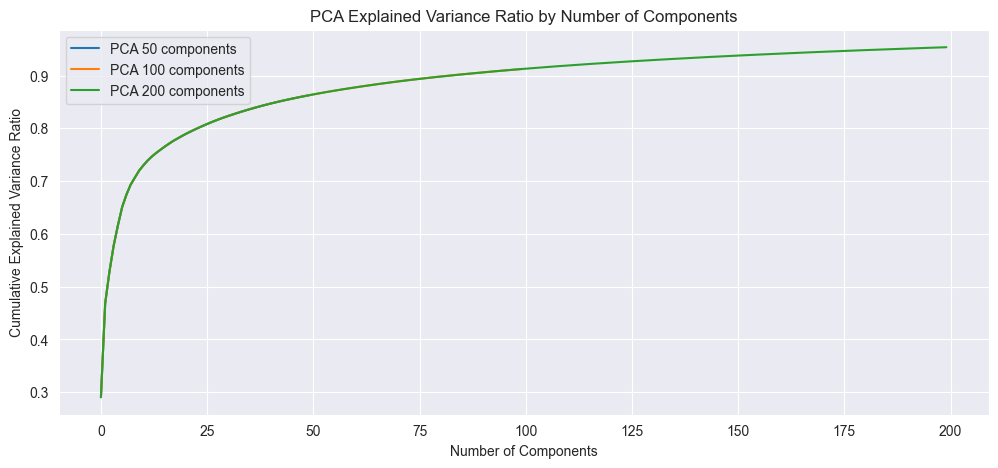

In [27]:
# 1. Apply PCA
def apply_pca(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Calculate explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    return X_train_pca, X_test_pca, explained_variance_ratio, cumulative_variance_ratio

# Apply PCA with different component counts
n_components_list = [50, 100, 200]
pca_results = {}

for n in n_components_list:
    X_train_pca, X_test_pca, var_ratio, cum_var_ratio = apply_pca(X_train, X_test, n)
    pca_results[n] = {
        'X_train': X_train_pca,
        'X_test': X_test_pca,
        'var_ratio': var_ratio,
        'cum_var_ratio': cum_var_ratio
    }
    
    # Print explained variance ratio for each PCA component count
    print(f"PCA with {n} components:")
    print(f"Explained Variance Ratio (first 10 components): {var_ratio[:10]}")
    print(f"Cumulative Explained Variance Ratio: {cum_var_ratio[-1]:.4f}")
    print("")

# 3. Visualize cumulative explained variance ratio for each PCA component count
plt.figure(figsize=(12, 5))
for n in n_components_list:
    plt.plot(pca_results[n]['cum_var_ratio'], label=f'PCA {n} components')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio by Number of Components')
plt.legend()
plt.grid(True)
plt.show()


D·ªØ li·ªáu c√≥ ƒë·∫øn 28x28 chi·ªÅu nh∆∞ng ch·ªâ c·∫ßn 50 vector th√†nh ph·∫ßn ƒë√£ c√≥ th·ªÉ gi·∫£i th√≠ch ƒë∆∞·ª£c ƒë·∫øn 86,26% c·ªßa b·ªô d·ªØ li·ªáu, n·∫øu 200 th√†nh ph·∫ßn th√¨ l√™n ƒë·∫øn 95% b·ªô d·ªØ li·ªáu

In [28]:
from sklearn.decomposition import PCA

# ƒê·ªãnh nghƒ©a h√†m reconstruction
def reconstruction(x, n_components, pca):
    """
    T√°i t·∫°o m·ªôt h√¨nh ·∫£nh t·ª´ m·ªôt vector PCA v·ªõi s·ªë l∆∞·ª£ng th√†nh ph·∫ßn `n_components`.
    """
    # Ch·ªçn n_components ƒë·∫ßu ti√™n c·ªßa PCA cho vi·ªác t√°i t·∫°o
    x_reduced = pca.transform([x])[0][:n_components]
    # ƒê·∫∑t c√°c th√†nh ph·∫ßn c√≤n l·∫°i b·∫±ng 0
    x_full = np.zeros(pca.n_components_)
    x_full[:n_components] = x_reduced
    # Inverse transform ƒë·ªÉ t√°i t·∫°o l·∫°i h√¨nh ·∫£nh g·ªëc
    return pca.inverse_transform([x_full])[0]


def n_sample_reconstructions(X, n_samples=5, trans_n=200, trans=None):
    sample_indices = np.round(np.random.random(n_samples) * len(X)).astype(int)
    return (sample_indices, 
            np.vstack([reconstruction(X[ind], trans_n, trans) for ind in sample_indices]))

def plot_reconstructions(X, n_samples=5, trans_list=[50, 120, 200], trans=None):
    """
    Plots `n_samples` reconstructions for each specified number of components in `trans_list`.
    """
    fig, axarr = plt.subplots(n_samples, 4, figsize=(8, n_samples * 2))
    
    for i in range(n_samples):
        index = int(np.random.randint(0, len(X)))
        
        # V·∫Ω h√¨nh ·∫£nh g·ªëc
        sns.heatmap(X[index].reshape(28, 28), cmap='gray_r', ax=axarr[i][0])
        axarr[i][0].set_title("Original Image", fontsize=12)
        axarr[i][0].axis('off')
        
        # V·∫Ω c√°c ·∫£nh t√°i t·∫°o t·ª´ s·ªë l∆∞·ª£ng th√†nh ph·∫ßn PCA kh√°c nhau
        for j, n_components in enumerate(trans_list):
            recon_img = reconstruction(X[index], n_components, trans).reshape(28, 28)
            sns.heatmap(recon_img, cmap='gray_r', ax=axarr[i][j + 1])
            axarr[i][j + 1].set_title(f"{n_components}-Vector Rec", fontsize=12)
            axarr[i][j + 1].axis('off')
    
    plt.tight_layout()
    plt.show()


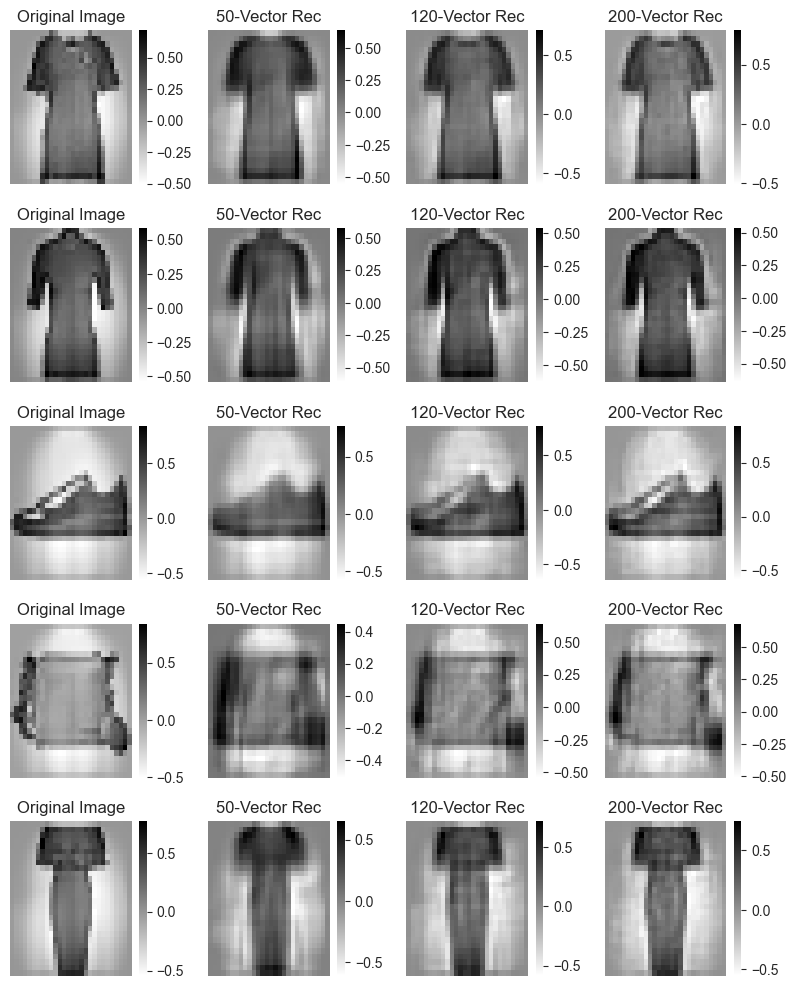

In [29]:
# Th·ª±c hi·ªán PCA v·ªõi s·ªë l∆∞·ª£ng th√†nh ph·∫ßn t·ªëi ƒëa c·∫ßn thi·∫øt
max_components = 200
pca = PCA(n_components=max_components)
X_pca = pca.fit_transform(X_test)  # Bi·∫øn ƒë·ªïi d·ªØ li·ªáu b·∫±ng PCA

# G·ªçi h√†m plot_reconstructions v·ªõi c√°c s·ªë l∆∞·ª£ng th√†nh ph·∫ßn PCA kh√°c nhau
plot_reconstructions(X_test, n_samples=5, trans_list=[50, 120, 200], trans=pca)

In [30]:
# 2. Th·ª±c hi·ªán LDA
def apply_lda(X_train, X_test, y_train, y_test, n_components):
    lda = LDA(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    return X_train_lda, X_test_lda

# LDA ch·ªâ c√≥ th·ªÉ gi·∫£m xu·ªëng s·ªë classes - 1
X_train_lda, X_test_lda = apply_lda(X_train, X_test, y_train, y_test, n_components=9)

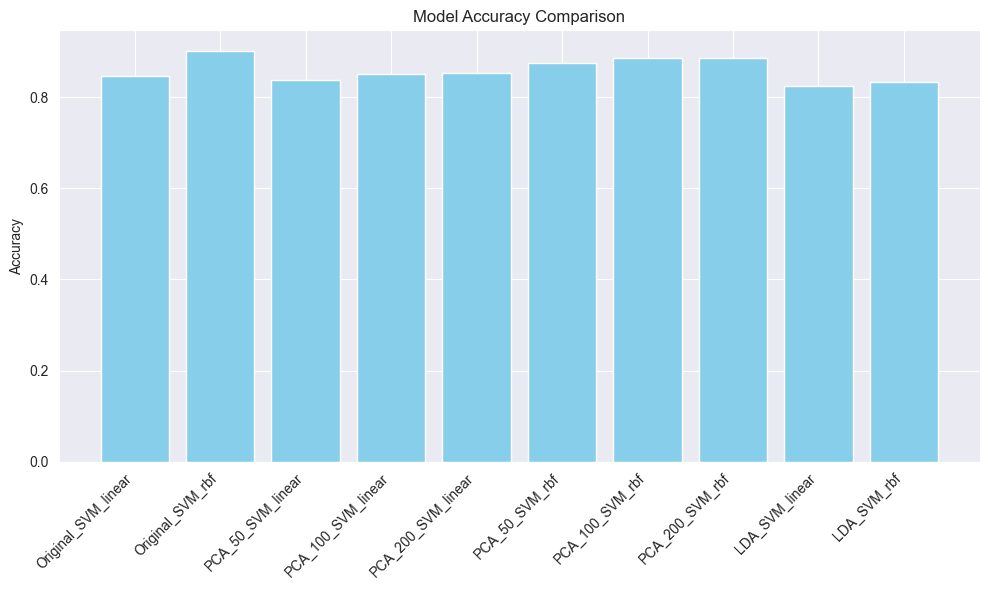

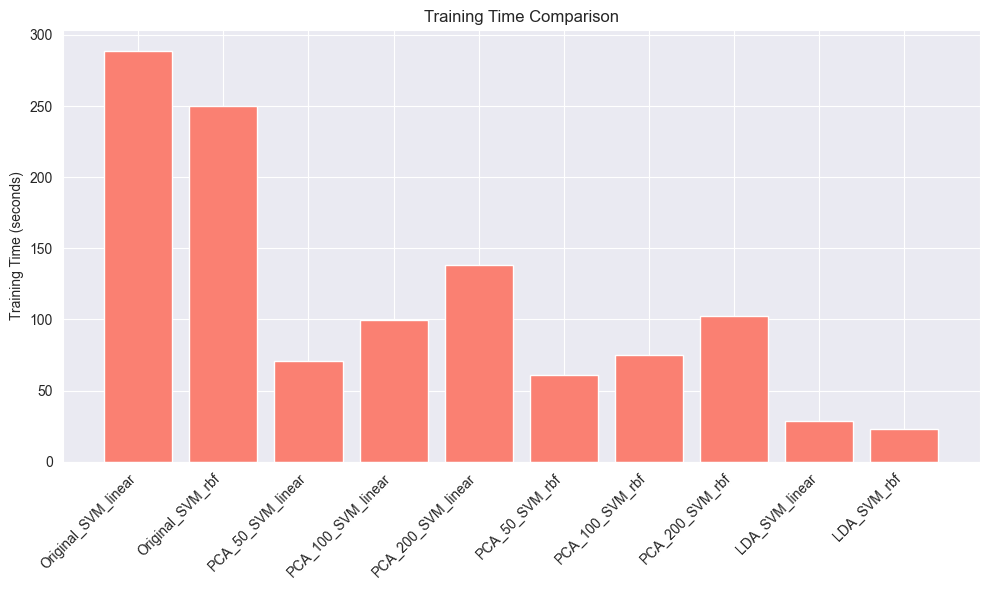


Detailed Results Table:


Model  Accuracy  Train Time (s)  Predict Time (s)
0  Original_SVM_linear    0.8464      288.805214         59.510849
1     Original_SVM_rbf    0.9013      250.244291        100.893917
2    PCA_50_SVM_linear    0.8365       70.899405          6.369592
3   PCA_100_SVM_linear    0.8495       99.475996         10.038853
4   PCA_200_SVM_linear    0.8521      138.219895         16.786967
5       PCA_50_SVM_rbf    0.8750       61.048853         20.730717
6      PCA_100_SVM_rbf    0.8847       75.047706         24.140675
7      PCA_200_SVM_rbf    0.8855      102.164154         31.683364
8       LDA_SVM_linear    0.8253       28.770586          3.479590
9          LDA_SVM_rbf    0.8341       23.263904         14.727876

In [31]:
# 4. Train v√† evaluate models (simplified without classification_report)
def train_and_evaluate(X_train, X_test, y_train, y_test, kernel='rbf'):
    model = SVC(kernel=kernel)
    
    # Training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return {
        'accuracy': accuracy,
        'train_time': train_time,
        'predict_time': predict_time,
    }

# Dictionary ƒë·ªÉ l∆∞u k·∫øt qu·∫£
results = {
    'Original_SVM_linear': {
        'accuracy': linear_acc,
        'train_time': linear_train_time,
        'predict_time': linear_pred_time,
    },
    'Original_SVM_rbf': {
        'accuracy': rbf_acc,
        'train_time': rbf_train_time,
        'predict_time': rbf_pred_time,
    }
}

# Train tr√™n d·ªØ li·ªáu PCA cho SVM Linear v√† RBF
for kernel in ['linear', 'rbf']:
    for n in n_components_list:
        results[f'PCA_{n}_SVM_{kernel}'] = train_and_evaluate(
            pca_results[n]['X_train'], pca_results[n]['X_test'], y_train, y_test, kernel
        )

# Train tr√™n d·ªØ li·ªáu LDA
for kernel in ['linear', 'rbf']:
    results[f'LDA_SVM_{kernel}'] = train_and_evaluate(
        X_train_lda, X_test_lda, y_train, y_test, kernel
    )

# 5. Visualize results with separate plots
def plot_comparison(results):
    # Extract data for plotting
    methods = list(results.keys())
    accuracies = [results[m]['accuracy'] for m in methods]
    train_times = [results[m]['train_time'] for m in methods]
    
    # Plot accuracy comparison
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(methods)), accuracies, color='skyblue')
    plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.tight_layout()
    plt.show()

    # Plot training time comparison
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(methods)), train_times, color='salmon')
    plt.xticks(range(len(methods)), methods, rotation=45, ha='right')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time Comparison')
    plt.tight_layout()
    plt.show()

plot_comparison(results)

# 6. Display detailed results in a table
def display_results_table(results):
    # Convert results dictionary to DataFrame
    df_results = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [results[m]['accuracy'] for m in results],
        'Train Time (s)': [results[m]['train_time'] for m in results],
        'Predict Time (s)': [results[m]['predict_time'] for m in results]
    })
    
    # Display the DataFrame as a table
    print("\nDetailed Results Table:")
    display(df_results)

display_results_table(results)


Nh√¨n v√†o b·∫£ng k·∫øt qu·∫£ chi ti·∫øt c·ªßa c√°c m√¥ h√¨nh SVM v·ªõi c√°c c·∫•u h√¨nh kh√°c nhau, ta c√≥ th·ªÉ ph√¢n t√≠ch v·ªÅ th·ªùi gian hu·∫•n luy·ªán v√† ƒë·ªô ch√≠nh x√°c nh∆∞ sau:

1. Original SVM Linear vs. Original SVM RBF:
- ƒê·ªô ch√≠nh x√°c: M√¥ h√¨nh SVM v·ªõi kernel RBF c√≥ ƒë·ªô ch√≠nh x√°c cao h∆°n ƒë√°ng k·ªÉ (0.9013) so v·ªõi kernel tuy·∫øn t√≠nh (0.8464). ƒêi·ªÅu n√†y c√≥ th·ªÉ l√† do kernel RBF c√≥ kh·∫£ nƒÉng bi·ªÉu di·ªÖn c√°c bi√™n quy·∫øt ƒë·ªãnh phi tuy·∫øn t√≠nh, gi√∫p n√≥ ph√π h·ª£p h∆°n v·ªõi d·ªØ li·ªáu c√≥ c·∫•u tr√∫c ph·ª©c t·∫°p.
Th·ªùi gian hu·∫•n luy·ªán: M√¥ h√¨nh RBF y√™u c·∫ßu nhi·ªÅu th·ªùi gian hu·∫•n luy·ªán h∆°n (274.63 gi√¢y so v·ªõi 340.94 gi√¢y cho kernel tuy·∫øn t√≠nh), ƒëi·ªÅu n√†y c√≥ th·ªÉ ƒë∆∞·ª£c gi·∫£i th√≠ch b·ªüi s·ª± ph·ª©c t·∫°p c·ªßa RBF kernel, y√™u c·∫ßu t√≠nh to√°n kho·∫£ng c√°ch phi tuy·∫øn gi·ªØa c√°c ƒëi·ªÉm d·ªØ li·ªáu.
SVM Linear v·ªõi c√°c th√†nh ph·∫ßn PCA kh√°c nhau (50, 100, 200):

- ƒê·ªô ch√≠nh x√°c: Khi s·ªë l∆∞·ª£ng th√†nh ph·∫ßn PCA tƒÉng (t·ª´ 50 ƒë·∫øn 200), ƒë·ªô ch√≠nh x√°c tƒÉng nh·∫π t·ª´ 0.8365 l√™n 0.8516. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng vi·ªác gi·ªØ l·∫°i nhi·ªÅu th√¥ng tin h∆°n v·ªÅ d·ªØ li·ªáu qua PCA gi√∫p m√¥ h√¨nh ph√¢n lo·∫°i t·ªët h∆°n.
- Th·ªùi gian hu·∫•n luy·ªán: Th·ªùi gian hu·∫•n luy·ªán c·ªßa SVM gi·∫£m r√µ r·ªát khi √°p d·ª•ng PCA, ƒë·∫∑c bi·ªát l√† v·ªõi PCA 50 th√†nh ph·∫ßn (98.69 gi√¢y) so v·ªõi m√¥ h√¨nh g·ªëc (340.93 gi√¢y). ƒêi·ªÅu n√†y l√† do s·ªë chi·ªÅu d·ªØ li·ªáu gi·∫£m, gi√∫p SVM t√≠nh to√°n hi·ªáu qu·∫£ h∆°n.
SVM RBF v·ªõi c√°c th√†nh ph·∫ßn PCA kh√°c nhau (50, 100, 200):

ƒê·ªô ch√≠nh x√°c: SVM RBF ƒë·∫°t ƒë·ªô ch√≠nh x√°c cao h∆°n ƒë√°ng k·ªÉ so v·ªõi SVM tuy·∫øn t√≠nh khi √°p d·ª•ng PCA, v·ªõi PCA 200 th√†nh ph·∫ßn ƒë·∫°t ƒë·ªô ch√≠nh x√°c cao nh·∫•t l√† 0.8856. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng RBF kernel k·∫øt h·ª£p v·ªõi PCA c√≥ th·ªÉ n·∫Øm b·∫Øt c√°c ƒë·∫∑c ƒëi·ªÉm ph·ª©c t·∫°p h∆°n c·ªßa d·ªØ li·ªáu.
Th·ªùi gian hu·∫•n luy·ªán: Th·ªùi gian hu·∫•n luy·ªán gi·∫£m ƒë√°ng k·ªÉ khi √°p d·ª•ng PCA, v√≠ d·ª• v·ªõi PCA 50 th√†nh ph·∫ßn l√† 48.47 gi√¢y, nhanh h∆°n so v·ªõi m√¥ h√¨nh SVM RBF g·ªëc (274.63 gi√¢y).
LDA v·ªõi SVM Linear v√† RBF:

ƒê·ªô ch√≠nh x√°c: C√°c m√¥ h√¨nh SVM v·ªõi LDA c√≥ ƒë·ªô ch√≠nh x√°c th·∫•p h∆°n (0.8253 v·ªõi linear v√† 0.8341 v·ªõi RBF) so v·ªõi c√°c m√¥ h√¨nh SVM PCA ho·∫∑c kh√¥ng s·ª≠ d·ª•ng gi·∫£m chi·ªÅu. ƒêi·ªÅu n√†y c√≥ th·ªÉ l√† do LDA t·ªëi ∆∞u h√≥a cho vi·ªác ph√¢n t√°ch c√°c l·ªõp nh∆∞ng kh√¥ng gi·ªØ l·∫°i nhi·ªÅu th√¥ng tin bi·∫øn thi√™n nh∆∞ PCA.
Th·ªùi gian hu·∫•n luy·ªán: C·∫£ hai m√¥ h√¨nh LDA-SVM ƒë·ªÅu c√≥ th·ªùi gian hu·∫•n luy·ªán r·∫•t ng·∫Øn (32.14 gi√¢y cho tuy·∫øn t√≠nh v√† 22.76 gi√¢y cho RBF). ƒêi·ªÅu n√†y l√† do LDA gi·∫£m chi·ªÅu d·ªØ li·ªáu r·∫•t m·∫°nh, gi·ªõi h·∫°n s·ªë l∆∞·ª£ng th√†nh ph·∫ßn t·ªëi ƒëa (c - 1, v·ªõi c l√† s·ªë l·ªõp).
K·∫øt lu·∫≠n:
V·ªÅ ƒë·ªô ch√≠nh x√°c: SVM v·ªõi kernel RBF v√† PCA ƒë·∫°t ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c cao nh·∫•t, ƒë·∫∑c bi·ªát khi s·ª≠ d·ª•ng nhi·ªÅu th√†nh ph·∫ßn PCA (100 ho·∫∑c 200).
V·ªÅ th·ªùi gian hu·∫•n luy·ªán: PCA gi√∫p gi·∫£m ƒë√°ng k·ªÉ th·ªùi gian hu·∫•n luy·ªán cho c·∫£ kernel tuy·∫øn t√≠nh v√† RBF. LDA cho th·ªùi gian hu·∫•n luy·ªán ng·∫Øn nh·∫•t nh∆∞ng ƒë√°nh ƒë·ªïi b·∫±ng ƒë·ªô ch√≠nh x√°c th·∫•p h∆°n.
L√Ω do cho c√°c xu h∆∞·ªõng n√†y ch·ªß y·∫øu l√† do t√≠nh ch·∫•t c·ªßa kernel v√† c√°ch gi·∫£m chi·ªÅu d·ªØ li·ªáu. Kernel RBF ph√π h·ª£p v·ªõi d·ªØ li·ªáu phi tuy·∫øn, trong khi LDA l√†m m·∫•t th√¥ng tin v·ªÅ bi·∫øn thi√™n t·ªïng th·ªÉ khi c·ªë g·∫Øng t·ªëi ∆∞u h√≥a cho vi·ªác ph√¢n l·ªõp.

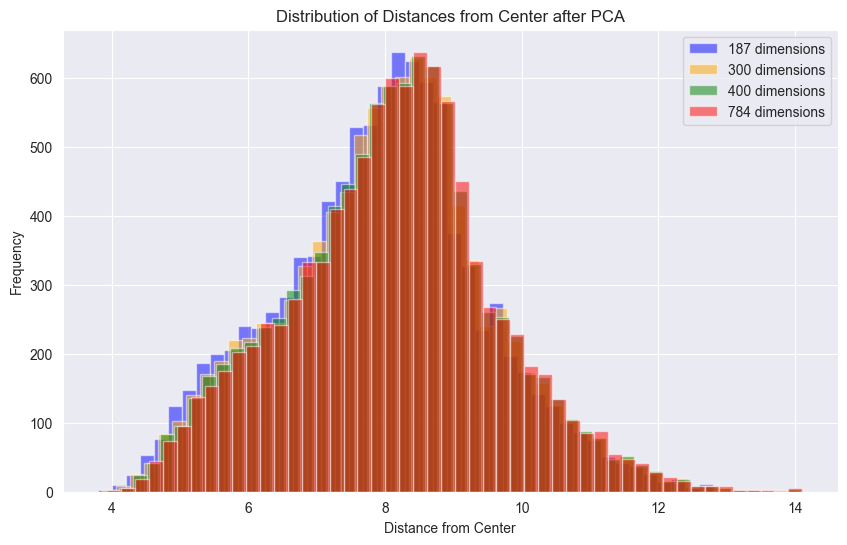

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Load d·ªØ li·ªáu Fashion MNIST
sample_size = 10000
X_sample = X_train[:sample_size]  # Ch·ªçn 10,000 m·∫´u ƒë·∫ßu ti√™n

# C√°c s·ªë chi·ªÅu sau PCA c·∫ßn ki·ªÉm tra
dimensions = [187, 300, 400, 784]
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 6))

# T·∫°o histogram cho m·ªói s·ªë chi·ªÅu sau khi √°p d·ª•ng PCA
for dim, color in zip(dimensions, colors):
    # √Åp d·ª•ng PCA
    pca = PCA(n_components=dim)
    X_reduced = pca.fit_transform(X_sample)
    
    # T√≠nh kho·∫£ng c√°ch t·ª´ m·ªói ƒëi·ªÉm ƒë·∫øn t√¢m
    center = np.mean(X_reduced, axis=0)
    distances = np.linalg.norm(X_reduced - center, axis=1)
    
    # V·∫Ω histogram
    plt.hist(distances, bins=50, color=color, alpha=0.5, label=f'{dim} dimensions')

plt.title('Distribution of Distances from Center after PCA')
plt.xlabel('Distance from Center')
plt.ylabel('Frequency')
plt.legend()
plt.show()


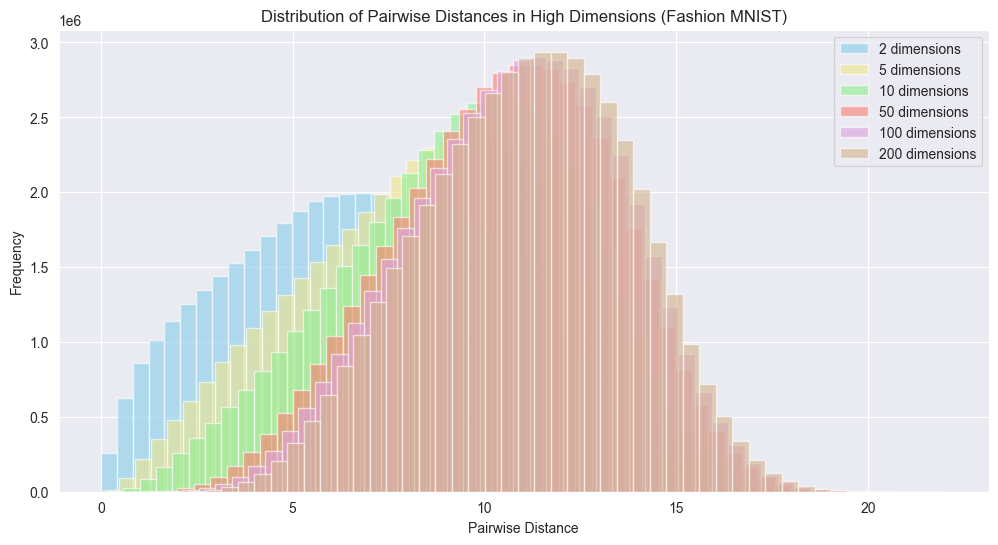

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from sklearn.datasets import fetch_openml

# T·∫£i d·ªØ li·ªáu Fashion MNIST
X_sample2 = X_train[:10000]  # Ch·ªçn 1000 m·∫´u ƒë·∫ßu ti√™n ƒë·ªÉ gi·∫£m t√≠nh to√°n

# C√°c s·ªë chi·ªÅu c·∫ßn ki·ªÉm tra sau khi gi·∫£m chi·ªÅu b·∫±ng PCA
dimensions = [2, 5, 10, 50, 100, 200]
colors = ['skyblue', 'khaki', 'lightgreen', 'salmon', 'plum', 'tan']

plt.figure(figsize=(12, 6))

# T·∫°o v√† v·∫Ω histogram cho m·ªói s·ªë chi·ªÅu sau khi √°p d·ª•ng PCA
for dim, color in zip(dimensions, colors):
    # √Åp d·ª•ng PCA ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu xu·ªëng s·ªë chi·ªÅu `dim` dec
    pca = PCA(n_components=dim)
    X_reduced = pca.fit_transform(X_sample2)
    
    # T√≠nh kho·∫£ng c√°ch t·ª´ng c·∫∑p gi·ªØa c√°c ƒëi·ªÉm trong kh√¥ng gian gi·∫£m chi·ªÅu
    distances = pdist(X_reduced)
    
    # V·∫Ω histogram cho ph√¢n ph·ªëi kho·∫£ng c√°ch
    plt.hist(distances, bins=50, color=color, alpha=0.6, label=f'{dim} dimensions')

plt.title('Distribution of Pairwise Distances in High Dimensions (Fashion MNIST)')
plt.xlabel('Pairwise Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()


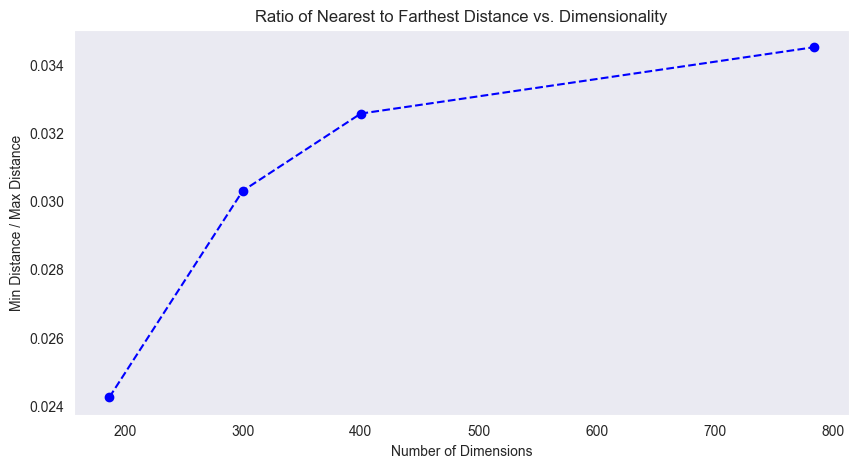

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from sklearn.datasets import fetch_openml

# T·∫£i d·ªØ li·ªáu Fashion MNIST
X_sample3 = X_train[:10000]  # Ch·ªçn 1000 m·∫´u ƒë·∫ßu ti√™n ƒë·ªÉ gi·∫£m t√≠nh to√°n

# C√°c s·ªë chi·ªÅu c·∫ßn ki·ªÉm tra sau khi gi·∫£m chi·ªÅu b·∫±ng PCA
dimensions = [187, 300, 400, 784]
ratios = []

# T√≠nh t·ª∑ l·ªá kho·∫£ng c√°ch nh·ªè nh·∫•t/l·ªõn nh·∫•t cho m·ªói s·ªë chi·ªÅu
for dim in dimensions:
    # √Åp d·ª•ng PCA ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu xu·ªëng s·ªë chi·ªÅu `dim`
    pca = PCA(n_components=dim)
    X_reduced = pca.fit_transform(X_sample3)
    
    # T√≠nh kho·∫£ng c√°ch t·ª´ng c·∫∑p gi·ªØa c√°c ƒëi·ªÉm trong kh√¥ng gian gi·∫£m chi·ªÅu
    distances = pdist(X_reduced)
    
    # T√≠nh kho·∫£ng c√°ch nh·ªè nh·∫•t v√† l·ªõn nh·∫•t
    min_distance = np.min(distances)
    max_distance = np.max(distances)
    
    # T√≠nh t·ª∑ l·ªá v√† th√™m v√†o danh s√°ch `ratios`
    ratio = min_distance / max_distance
    ratios.append(ratio)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 5))
plt.plot(dimensions, ratios, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Dimensions')
plt.ylabel('Min Distance / Max Distance')
plt.title('Ratio of Nearest to Farthest Distance vs. Dimensionality')
plt.grid()
plt.show()


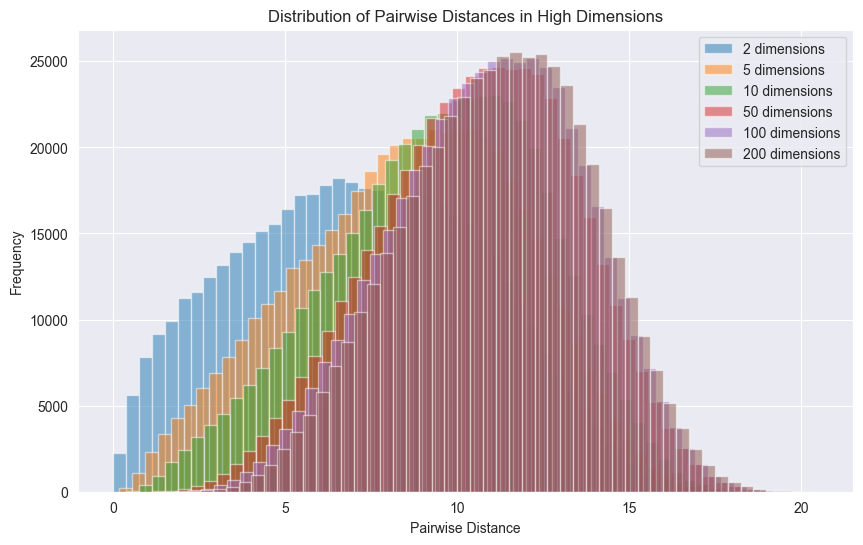

In [46]:
from scipy.spatial.distance import pdist
import numpy as np
import matplotlib.pyplot as plt

# T·∫£i d·ªØ li·ªáu Fashion MNIST
X_sample4 = X_train[:1000]  # Ch·ªçn 1000 m·∫´u ƒë·∫ßu ti√™n ƒë·ªÉ gi·∫£m t√≠nh to√°n

# Plot the distribution of pairwise distances for different dimensions
plt.figure(figsize=(10, 6))
for dim, color in zip(dimensions, colors):
    pca = PCA(n_components=dim)
    X_reduced = pca.fit_transform(X_sample4)
    distances = pdist(X_reduced,metric='euclidean')
    plt.hist(distances, bins=50, alpha=0.5, label=f'{dim} dimensions')

plt.title('Distribution of Pairwise Distances in High Dimensions')
plt.xlabel('Pairwise Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

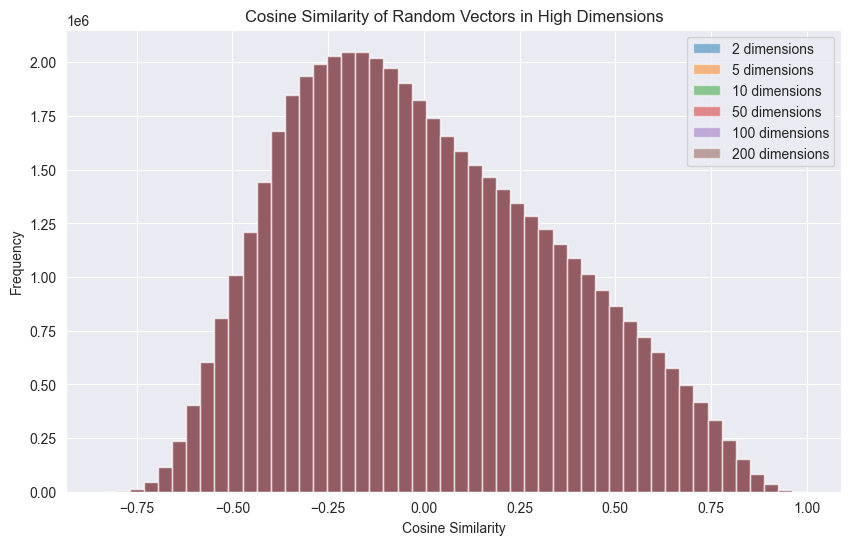

In [50]:
# T·∫£i d·ªØ li·ªáu Fashion MNIST
X_sample5 = X_train[:10000]  # Ch·ªçn 1000 m·∫´u ƒë·∫ßu ti√™n ƒë·ªÉ gi·∫£m t√≠nh to√°n

def cosine_similarity(vectors):
    from sklearn.metrics.pairwise import cosine_similarity
    return cosine_similarity(vectors)

# Parameters
dimensions_list = [2, 5, 10, 50, 100, 200]

# Plot the distribution of cosine similarities for different dimensions
plt.figure(figsize=(10, 6))
for dim in dimensions_list:
    cos_sim = cosine_similarity(X_sample5)
    # Only keep the upper triangular part of the similarity matrix (since it's symmetric)
    cos_sim_upper = cos_sim[np.triu_indices_from(cos_sim, k=1)]
    plt.hist(cos_sim_upper, bins=50, alpha=0.5, label=f'{dim} dimensions')

plt.title('Cosine Similarity of Random Vectors in High Dimensions')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [2]:
import ollama


In [3]:
response = ollama.chat(model='llama3.2', messages=[
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
])
print(response['message']['content'])

The sky appears blue because of a phenomenon called Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described it in the late 19th century.

Here's what happens:

1. Sunlight enters Earth's atmosphere and is made up of a spectrum of colors, including all the colors of the visible light spectrum.
2. When sunlight encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2), which are present in the air, it scatters in all directions.
3. The smaller molecules are more effective at scattering shorter (blue) wavelengths than longer (red) wavelengths.
4. As a result, when we look up at the sky, our eyes see more blue light scattered by these tiny molecules than any other color.

This is why the sky appears blue during the daytime, especially in the direction of the sun. The amount of scattering that occurs depends on the angle of the sunlight and the position of the observer.

It's worth noting that the color of the sky can change under different c